## Imports and setup

In [1]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle as pkl

from tensorflow.examples.tutorials.mnist import input_data

import h5py

import scipy.io
from PIL import Image

# MNIST overview

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
The training set is:
(55000, 784)
The validation set is:
(5000, 784)
Reshape image
(28, 28)


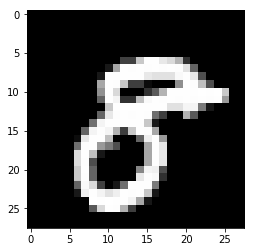

In [2]:
mnist = input_data.read_data_sets('MNIST_data',one_hot=True)
print("The training set is:")
print(mnist.train.images.shape)
print("The validation set is:")
print(mnist.validation.images.shape)

# De-flatten
one_image_mnist = np.reshape(mnist.train.images[29],[28,28])
print("Reshape image")
print(one_image_mnist.shape)

plt.imshow(one_image_mnist, cmap="Greys_r")

# USPS Overview

Training values shape
(7291, 256)
Training labels shape
(7291,)
Testing values shape
(2007, 256)
Testing labels shape
(2007,)
Reshape image
(16, 16)


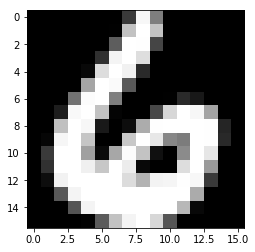

In [3]:
path = "Datasets/usps/usps.h5"
with h5py.File(path, 'r') as hf:
        train = hf.get('train')
        X_tr = train.get('data')[:]
        y_tr = train.get('target')[:]
        test = hf.get('test')
        X_te = test.get('data')[:]
        y_te = test.get('target')[:]
print("Training values shape")
print(X_tr.shape)
print("Training labels shape")
print(y_tr.shape)
print("Testing values shape")
print(X_te.shape)
print("Testing labels shape")
print(y_te.shape)

one_img_usps = np.reshape(X_tr[0],[16,16])
print("Reshape image")
print(one_img_usps.shape)

plt.imshow(one_img_usps, cmap="Greys_r")

# SVHN Overview

Raw Data Test
(32, 32, 3, 26032)
Raw Data Train
(32, 32, 3, 73257)
Reshape image
(32, 32, 3)


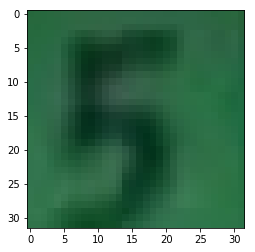

In [12]:
svhn_file = "Datasets/svhn/test_32x32.mat"
svhn_file_train = "Datasets/svhn/train_32x32.mat"
mat = scipy.io.loadmat(svhn_file)
mat_train = scipy.io.loadmat(svhn_file_train)
print("Raw Data Test")
print(mat['X'].shape)
print("Raw Data Train")
print(mat_train['X'].shape)
#svhn_data = np.reshape(mat['X'],[32,32])
one_img_svhn = mat['X'][:,:,:,0]
print("Reshape image")
print(one_img_svhn.shape)
#data = np.zeros((32,32,3),dtype=np.uint8)
#data[32,32] = mat['X'][:][:][:][0]

plt.imshow(one_img_svhn)

# SynthDigits Overview

Raw Data Test
(32, 32, 3, 9553)
Raw Data Train
(32, 32, 3, 479400)
Reshape image
(32, 32, 3)


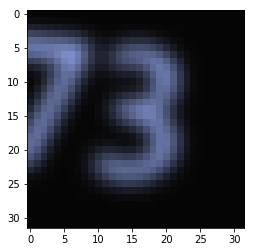

In [14]:
synth_file = "Datasets/SynthDigits/synth_test_32x32.mat"
synth_file_train = "Datasets/SynthDigits/synth_train_32x32.mat"
synthmat = scipy.io.loadmat(synth_file)
synthmat_train = scipy.io.loadmat(synth_file_train)
print("Raw Data Test")
print(synthmat['X'].shape)
print("Raw Data Train")
print(synthmat_train['X'].shape)

one_img_synth = synthmat['X'][:,:,:,0]
print("Reshape image")
print(one_img_synth.shape)
#data = np.zeros((32,32,3),dtype=np.uint8)
#data[32,32] = mat['X'][:][:][:][0]

plt.imshow(one_img_synth)

# MNIST M

(55000, 28, 28, 3)
(10000, 28, 28, 3)
(5000, 28, 28, 3)


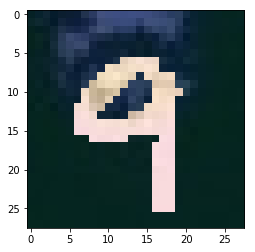

In [16]:
mnistm = pkl.load(open('mnistm_data.pkl', 'rb'))
mnistm_train = mnistm['train']
mnistm_test = mnistm['test']
mnistm_valid = mnistm['valid']

print(mnistm_train.shape)
print(mnistm_test.shape)
print(mnistm_valid.shape)

plt.imshow(mnistm_train[8])